# Loading Dataset

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

  Using cached matplotlib-3.7.3-cp39-cp39-win_amd64.whl (7.5 MB)


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data
data= pd.read_excel('news_share_data.xlsx')
print(data.shape)
data.head()

(1003, 22)


article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1            0.549618          4         1           0              4.636704   
2            0.577236          8         1           0              4.627451   
3            0.525896          4         1           0              5.083665   
4            0.588889          6         9           0              4.336022   

   num_keywords data_channel  min_avg_key  max_avg_key  avg_avg_key  \
0             5     Business     1459.500     4817.692     3370.415   
1             7         Tech        0.000     3581.094     2556.367   
2             7         Tech     2270.889     3852.800     3018.167   
3             9         Tech        0.000     3581.094     1871.403   
4             7        00000     3581.094     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  
0                      0.25    1600  
1                      0.00    1500  
2                      0.00    1400  
3                      0.00    1300  
4                      0.00    3000

In [4]:
df = data.copy()

In [5]:
df

article_id                                              title  \
0        7014291                 It's Time for a YouTube Competitor   
1        7014327  The Ultimate Roundup of 2014's Biggest April F...   
2        7014304  A Selfie and One Garish Jacket: How the Red So...   
3        7031995    African Telecom Proposes More Diverse Emoticons   
4        6541359  Google to Launch Improved Android Camera App, ...   
5        7033985  Apple to Begin iPhone 6 Screen Production in M...   
6        7014312       Apple Updates iWork for OS X, iOS and iCloud   
7        3299703  Spare Your Facebook Friends From These 9 April...   
8        7014271       Why Tech Takes April Fools' Day So Seriously   
9        7008095  Atlanta Is World's Busiest Airport With 94 Mil...   
10       7034016                     Who Is the Average Gmail User?   
11       7014003  B.J. Novak Joins the MashableReads Social Book...   
12       7014086       8 Simple Tips to Maximize Career Fulfillment   
13       7014161  Clippy Returns in Microsoft Office April Fools...   
14       6234475     Everyone Loves the Cloud Price Wars -- For Now   
15       7033834  New Comedy Central App Is a Bonanza of Full Ep...   
16       7013883  Drone Ball Brings Real-Life Quidditch a Step C...   
17       7014139  CBS Admits to 'Audio Error' for Adding Engine ...   
18       7033951               ESPN Makes Sport of Your Dating Woes   
19       7033961  Facebook Still Dominates on Mobile, But Its Le...   
20       7002009  What's the Deal With Facebook's Privacy Dinosaur?   
21       7029879  The Future of Email: The Internet's Least Exci...   
22       7013596      Samsung Unveils Galaxy Tab4 Mid-Range Tablets   
23       6643246  Game Developers Ditch YouTube Reality Show Aft...   
24       7014021  GM Recall Hearing: CEO Apologizes to Victims' ...   
25       7013433      5 Reasons You Should Care About the GM Recall   
26       7014024         12 Things Gmail's User Base Dwarfs in Size   
27       3527832  Google's April Fools' Jokes: Gmail Shelfie, Ch...   
28       7033844     How Google Fumbled Glass -- and How to Save It   
29       6807451  You Know Nothing, 'Game of Thrones' Fan -- So ...   
30       7013959  WTF Is HFT? What You Should Know About High-Fr...   
31       7013980  'House of Cards' Season 3 Sneak Peek Wins Apri...   
32       7013988  Fans React to the HIMYM Finale, and It Isn't P...   
33       7013957  'How I Met Your Mother' Kids Kept Show's Endin...   
34       7033728                      How to Make a Twitter Collage   
35       7013914  You'll Never Believe How Upworthy Is Going to ...   
36       7013911               The Illustrated Explanation of Gmail   
37       7013940  11 Innovative Lamps that Will Delight and Disturb   
38       6861651  LinkedIn Announces Cat Networking for Pawed Pr...   
39       7013922  Cast of Australian 'Lion King' Serenades Plane...   
40       7013580  Louis C.K. and Kenan Thompson Star In 'Black J...   
41       7033603  Magnitude 8.2 Earthquake Strikes Off the Coast...   
42       6868520  Last Words From Missing Plane: 'Good Night Mal...   
43       6806392  Facebook CEO Mark Zuckerberg Cut His Salary to $1   
44       7033467  Microsoft Build 2014: Windows 8.1 Update, Clou...   
45       7013829  Everything We Love About Baseball's Opening Da...   
46       2195051  Katniss Battles Loki in MTV Movie Awards' New ...   
47       7025165                  Looking Back on a Decade of Gmail   
48       7013708  Drool Over 20 Minutes of Bacon Footage on Netflix   
49       7033555  Obamacare Hits 7.1 Million -- Thank Zach Galif...   
50       7013783   Pebble Smartwatch Now Available at Target Stores   
51       7013801  'LOTR' Director's $80 Million Jet Joins Search...   
52       7013501   Photographer Slings Pizzas Into the Wild for Art   
53       7013730       You Can Now Down Vote on Reddit With a Frown   
54       7013734  Naughty 'Sex Tape' Trailer Explores Dangers of...   
55       7013564  SmartGlass I

In [6]:
df.columns

Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

## EDA and Data Pre processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

In [8]:
df.describe()

article_id  unique_tokens_rate    num_hrefs     num_imgs  \
count  1.003000e+03         1003.000000  1003.000000  1003.000000   
mean   6.915159e+06            0.526890    11.720837     5.188435   
std    4.823885e+05            0.118793    15.181597     8.495002   
min    2.195051e+06            0.000000     0.000000     0.000000   
25%    7.006102e+06            0.466751     4.000000     1.000000   
50%    7.013065e+06            0.533118     8.000000     2.000000   
75%    7.027570e+06            0.596615    14.000000     7.000000   
max    7.041291e+06            0.867925   162.000000    84.000000   

        num_videos  average_token_length  num_keywords  min_avg_key  \
count  1003.000000           1003.000000   1003.000000  1003.000000   
mean      1.215354              4.603757      7.206381  1131.437972   
std       4.079730              0.701756      1.856713  1181.134621   
min       0.000000              0.000000      2.000000     0.000000   
25%       0.000000              4.490363      6.000000     0.000000   
50%       0.000000              4.685484      7.000000   984.066700   
75%       1.000000              4.855388      9.000000  2116.714500   
max      51.000000              7.218430     10.000000  3613.040000   

         max_avg_key   avg_avg_key  href_avg_shares  global_subjectivity  \
count    1003.000000   1003.000000      1003.000000          1003.000000   
mean     6463.258234   3359.478830     13518.302031             0.446724   
std      7455.421154   1467.674637     51499.106509             0.109167   
min      3568.870000   1360.101000         0.000000             0.000000   
25%      3613.040000   2533.297000      1300.000000             0.395575   
50%      4635.807000   3004.755000      2766.667000             0.455990   
75%      6561.910000   3809.005000      7341.000000             0.509508   
max    102200.000000  17604.270000    663600.000000             0.875000   

       global_sentiment_polarity  global_rate_positive_words  \
count                1003.000000                 1003.000000   
mean                    0.106187                    0.038169   
std                     0.092496                    0.015673   
min                    -0.300000                    0.000000   
25%                     0.051911                    0.028655   
50%                     0.102579                    0.037325   
75%                     0.163183                    0.046922   
max                     0.489623                    0.120805   

       global_rate_negative_words  title_subjectivity  \
count                 1003.000000         1003.000000   
mean                     0.017772            0.292537   
std                      0.010557            0.325227   
min                      0.000000            0.000000   
25%                      0.011224            0.000000   
50%                      0.016266            0.200000   
75%                      0.022597            0.500000   
max                      0.103030            1.000000   

       title_sentiment_polarity         shares  
count               1003.000000    1003.000000  
mean                   0.057536    4247.304088  
std                    0.266609   22609.634435  
min                   -1.000000      58.000000  
25%                    0.000000    1000.000000  
50%                    0.000000    1600.000000  
75%                    0.150000    3100.000000  
max                    1.000000  663600.000000

In [9]:
# removing duplicates
df=df.drop_duplicates()

df.shape # no duplicates present

(1003, 22)

In [22]:
# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords


# text preprocessing helper functions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [23]:
df['title_clean'] = df['title'].apply(str).apply(lambda x: text_preprocessing(x))
df['text_clean'] = df['text'].apply(str).apply(lambda x: text_preprocessing(x))

In [24]:
df['text_clean'][3],df['text'][3]


('less than a week after apple pledged to make its emoticons more racially diverse african telecom oju has stepped into the fray with an app that lets you send emoticons of color the android app opens in a new window includes the gamut of basic emotions including happy surprised sad really sad and embarrassed a test of the app shows it doesn t really work like an emoticon though instead it merely sends an mms of a pic of one of the emotions which includes a plug for oju s website see also how to turn facebook profile pics into emoticons credit credit still it s a step in the right direction last week apple vowed to diversify its mostly white emoticons after miley cyrus and actor tahj mowry complained picking up on the grievance mtv act blogger joey parker emailed apple ceo tim cook opens in a new window parker got the following reply from apple rep katie cotton tim forwarded your email to me we agree with you our emoji characters are based on the unicode standard which is necessary for

In [25]:
# Creating a column for Number of words in each title

df['n_tokens_title'] = df['title_clean'].apply(lambda x: len(x.split(" ")))

In [26]:
# Creating a column for Number of words in each content

df['n_tokens_content'] = df['text_clean'].apply(lambda x: len(x.split(" ")))

In [27]:
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

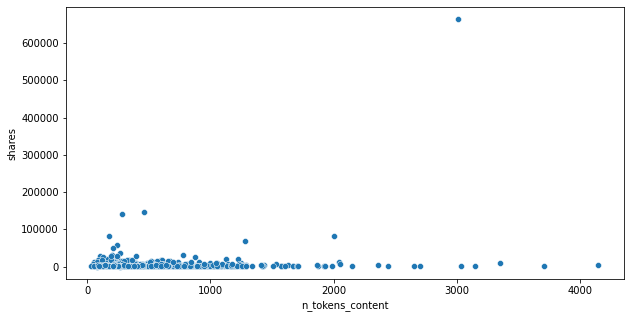

In [28]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=df)

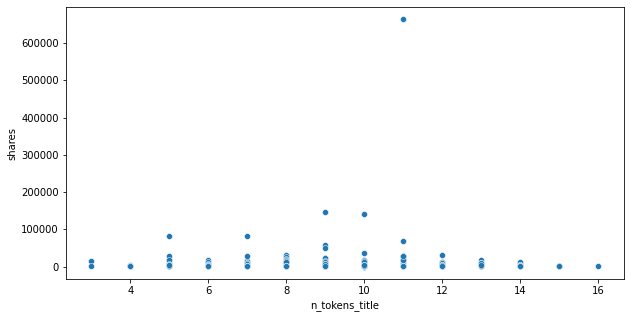

In [29]:
# Number of words in title vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df,palette='muted');

In [ ]:
# seperating numerical valued columns from textual columns

In [30]:
numeric = []
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        numeric.append(i)
        
numeric

['article_id',
 'unique_tokens_rate',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'min_avg_key',
 'max_avg_key',
 'avg_avg_key',
 'href_avg_shares',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'title_subjectivity',
 'title_sentiment_polarity',
 'shares',
 'n_tokens_title',
 'n_tokens_content']

In [31]:
text_col = []
for i in df.columns:
    if i in ['title_clean', 'text_clean', 'data_channel']:
        text_col.append(i)
        
text_col

['data_channel', 'title_clean', 'text_clean']

### Distribution of numeric feature

In [32]:
import matplotlib.style as style
style.use('fivethirtyeight')

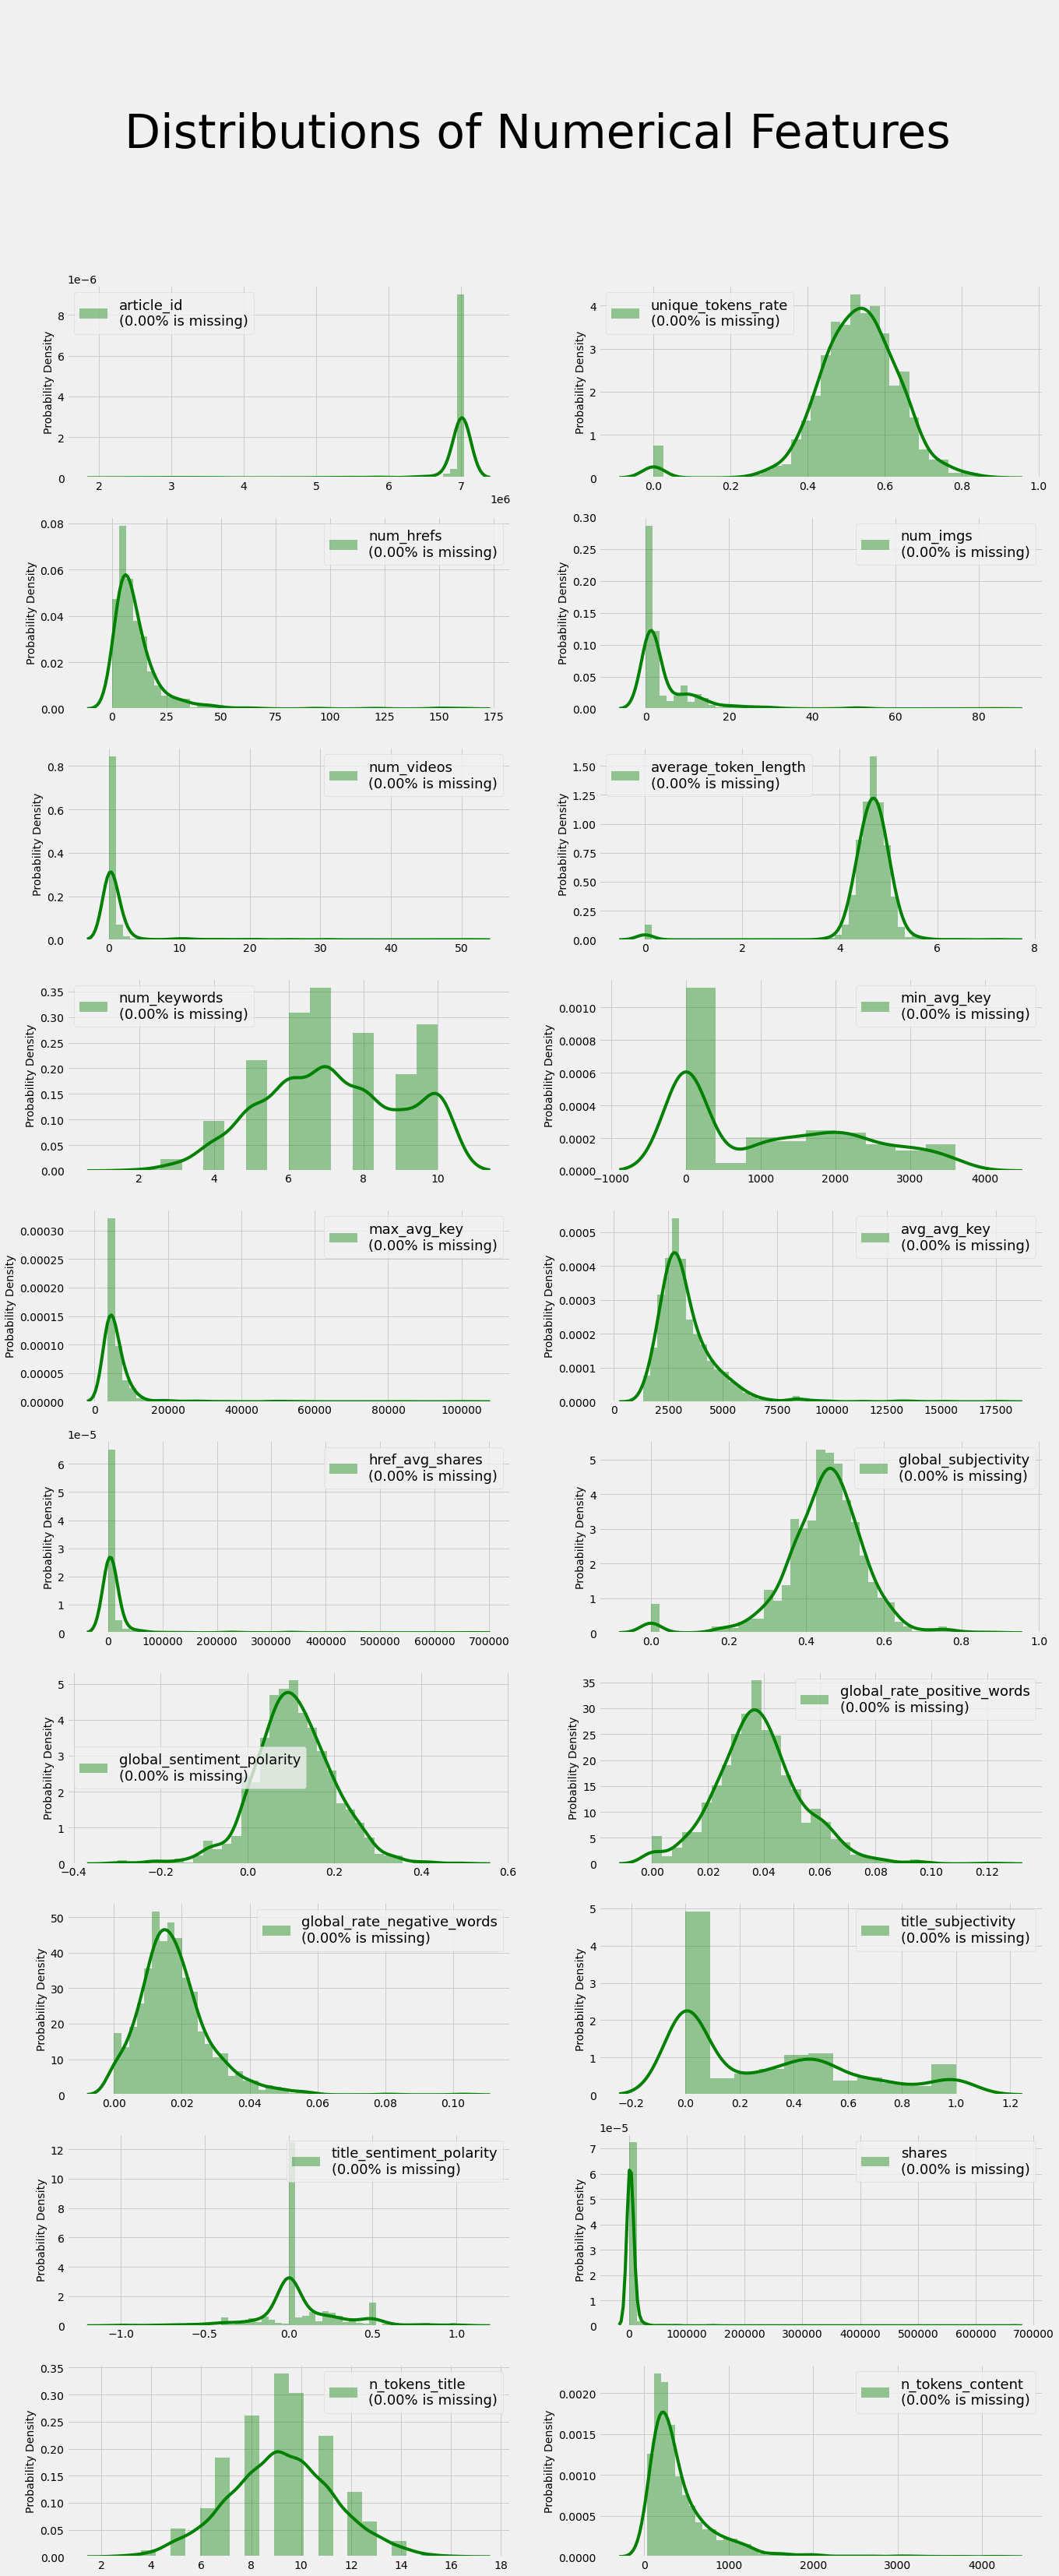

In [37]:
n_rows, n_cols = (10,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(df[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

### Distribultion of channel categories

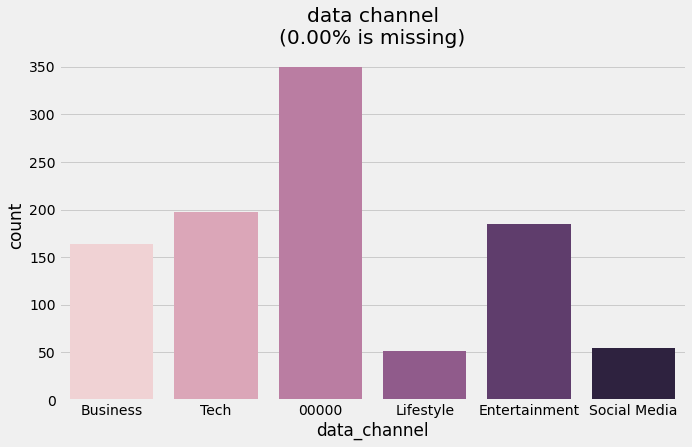

In [83]:

miss_perc="%.2f"%(100*(1-(df['data_channel'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)
plt.figure(figsize=(10, 6))
fig=sns.countplot(x=df['data_channel'],label=label, palette=sns.cubehelix_palette(rot=.35,light=0.85,hue=1))
plt.title("data channel\n({}% is missing)".format(miss_perc))
plt.show()

## Binary encoding

### 1) data channel

In [52]:
df['is_business'] = df['data_channel'] == 'Business'  # only business channel
df['is_business'] = df['is_business'].map({False: 0, True: 1})

df['is_tech'] = df['data_channel'] == 'Tech'  # only tech channel
df['is_tech'] = df['is_tech'].map({False: 0, True: 1})

df['is_lifestyle'] = df['data_channel'] == 'Lifestyle'  # only lifestyle channel
df['is_lifestyle'] = df['is_lifestyle'].map({False: 0, True: 1})

df['is_entertainment'] = df['data_channel'] == 'Entertainment'  # only entertainment channel
df['is_entertainment'] = df['is_entertainment'].map({False: 0, True: 1})

df['is_socialmedia'] = df['data_channel'] == 'Social Media'  # only social media channel
df['is_socialmedia'] = df['is_socialmedia'].map({False: 0, True: 1})

df['is_others'] = df['data_channel'] == '00000'  # only social media channel
df['is_others'] = df['is_others'].map({False: 0, True: 1})


### 2) day of publish

In [53]:
# creating a column that determines whether it was weekend when published
import datetime

df['is_weekend'] = df['published_date'].dt.dayofweek > 5  # Saturday and Sunday
df['is_weekend'] = df['is_weekend'].map({False: 0, True: 1})

In [54]:
df['is_weekend'].value_counts()

0    944
1     59
Name: is_weekend, dtype: int64

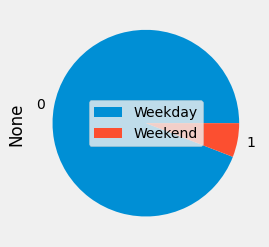

In [55]:
df.groupby('is_weekend').size().plot(kind='pie')
plt.legend(['Weekday', 'Weekend'])
plt.show()

In [56]:
# creating a column that determines whether it was Monday when published

df['is_monday'] = df['published_date'].dt.dayofweek == 0  # Monday
df['is_monday'] = df['is_monday'].map({False: 0, True: 1})

# creating a column that determines whether it was Tuesday when published

df['is_tuesday'] = df['published_date'].dt.dayofweek == 1  # Tuesday
df['is_tuesday'] = df['is_tuesday'].map({False: 0, True: 1})


# creating a column that determines whether it was Wednesday when published

df['is_wednesday'] = df['published_date'].dt.dayofweek == 2  # Wednesday
df['is_wednesday'] = df['is_wednesday'].map({False: 0, True: 1})

# creating a column that determines whether it was Thursday when published

df['is_thursday'] = df['published_date'].dt.dayofweek == 3  # Thursday
df['is_thursday'] = df['is_thursday'].map({False: 0, True: 1})

# creating a column that determines whether it was Friday when published

df['is_friday'] = df['published_date'].dt.dayofweek == 4  # Friday
df['is_friday'] = df['is_friday'].map({False: 0, True: 1})

In [57]:
df.shape

(1003, 39)

In [58]:
#Understanding target variable distribution
df['shares'].describe()

count      1003.000000
mean       4247.304088
std       22609.634435
min          58.000000
25%        1000.000000
50%        1600.000000
75%        3100.000000
max      663600.000000
Name: shares, dtype: float64

In [59]:
df['shares'].median()

1600.0

In [60]:
#setting a threshold using the median of shares for deciding the popularity of article.

df['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

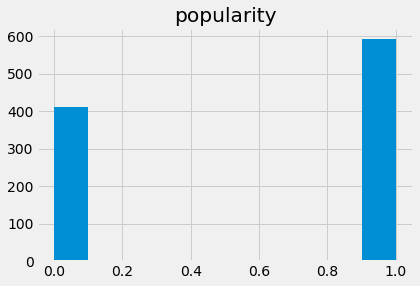

In [61]:
df.hist(column='popularity');

In [62]:
a,b = df['shares'].mean(),df['shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 4247.304087736789
Median article share = 1600.0


In [71]:
Wday = df.columns.values[32:38]
Wday

array(['is_weekend', 'is_monday', 'is_tuesday', 'is_wednesday',
       'is_thursday', 'is_friday'], dtype=object)

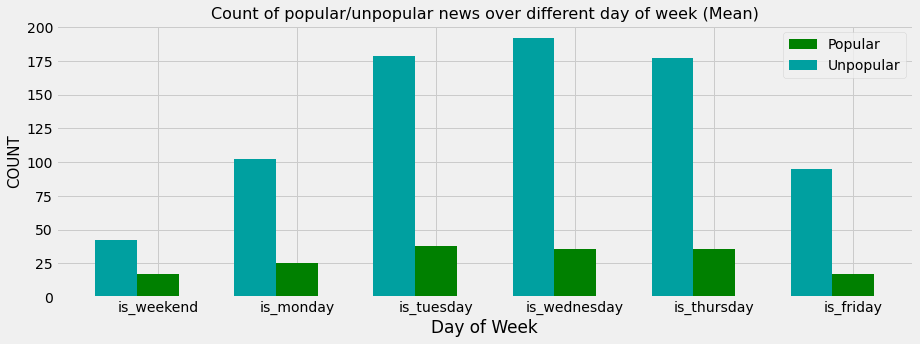

In [72]:
Unpop=df[df['shares']<a]
Pop=df[df['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

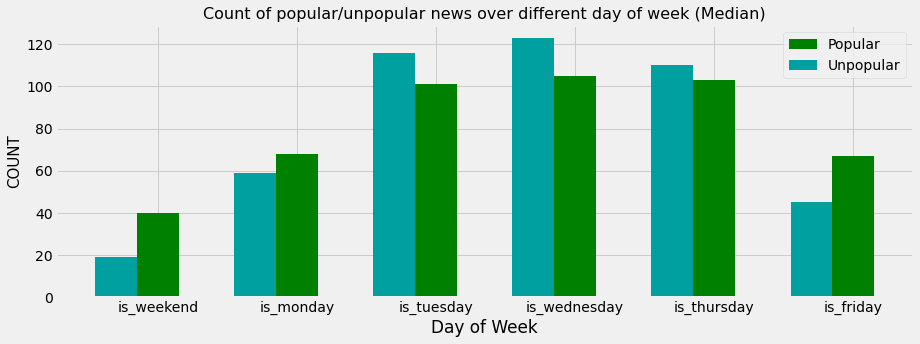

In [73]:
Unpop=df[df['shares']<b]
Pop=df[df['shares']>=b]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [74]:
Dc=df.columns[26:32]
Dc

Index(['is_business', 'is_tech', 'is_lifestyle', 'is_entertainment',
       'is_socialmedia', 'is_others'],
      dtype='object')

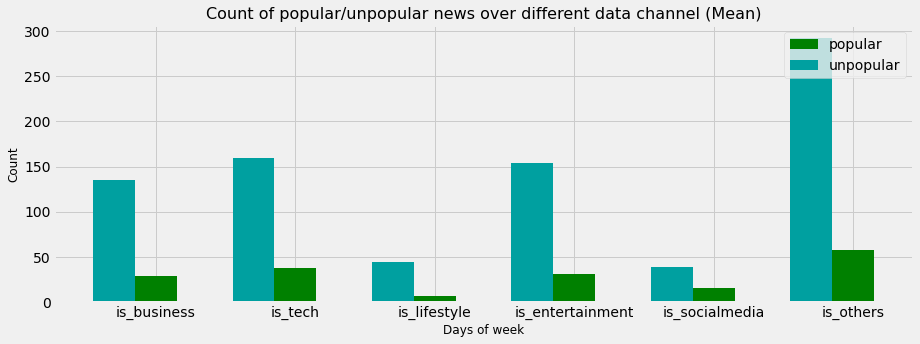

In [75]:
Unpop3=df[df['shares']<a]
Pop3=df[df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

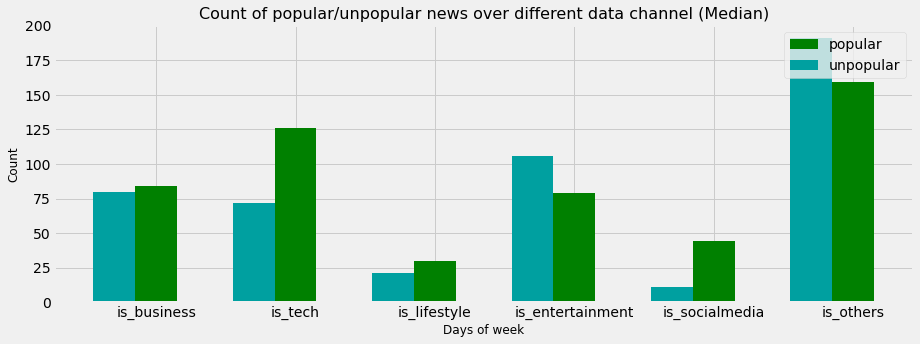

In [76]:
Unpop4=df[df['shares']<b]
Pop4=df[df['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# Feature Engineering

### 1) Treating Outliers

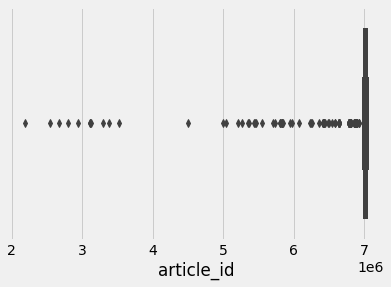

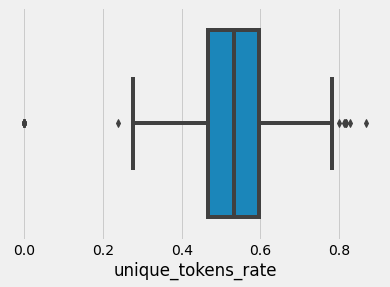

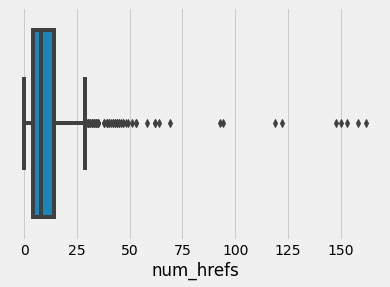

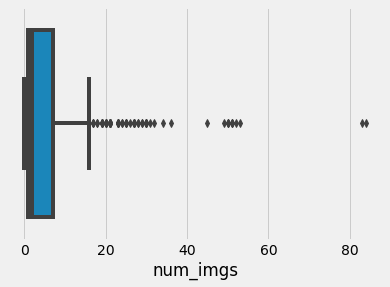

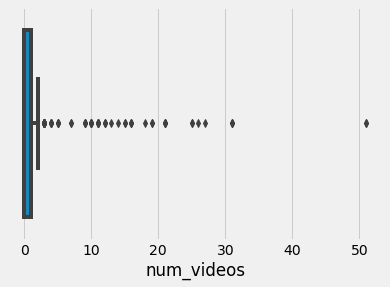

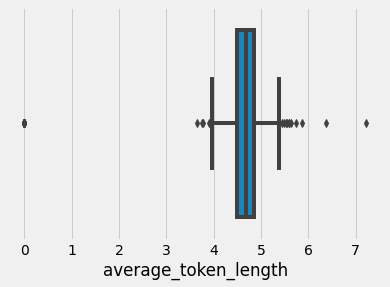

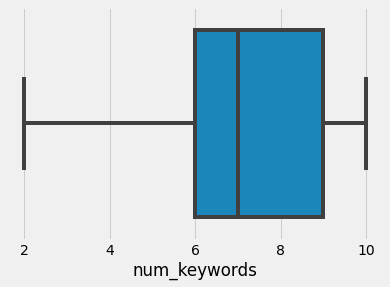

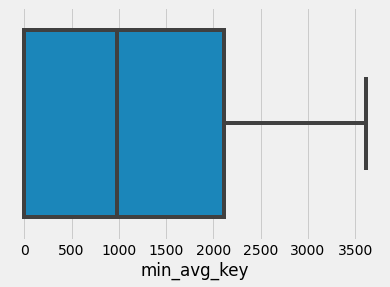

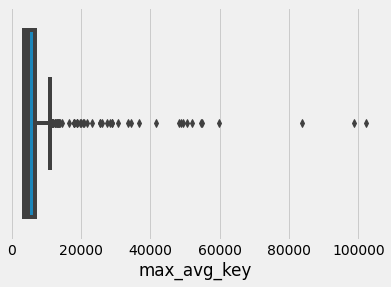

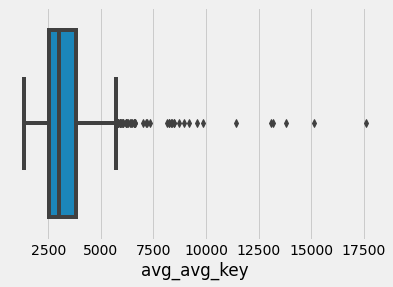

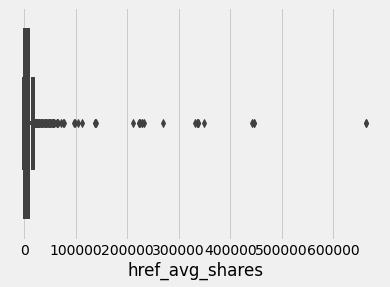

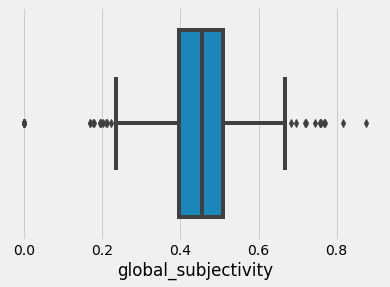

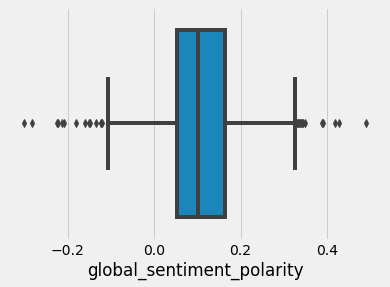

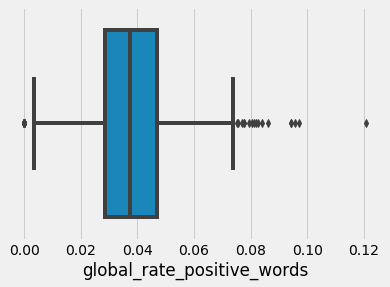

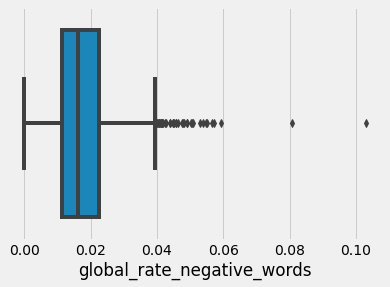

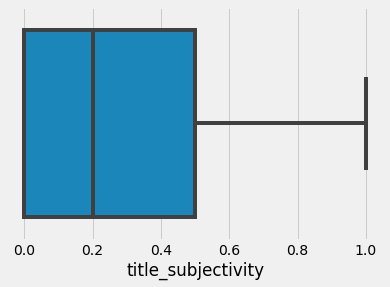

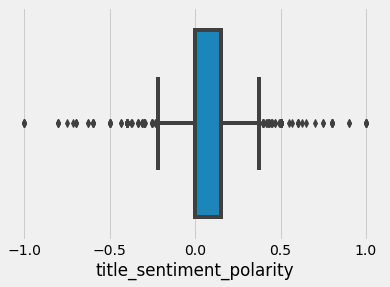

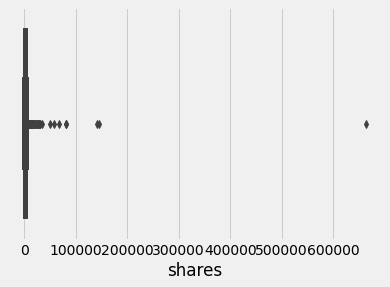

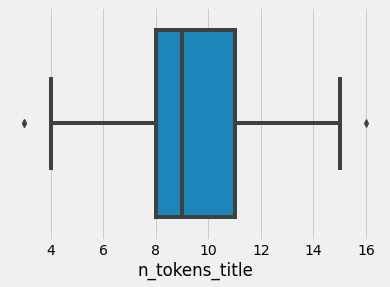

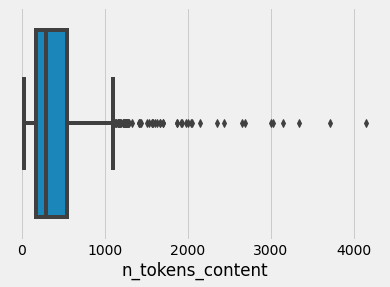

In [77]:
for i in range(len(numeric)):
    sns.boxplot(df[numeric[i]])
    plt.show()  #box plot

In [78]:
for column in numeric:    
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print('Lower limit:' + "{0:.2f}".format(llimit))
    print('Upper limit:' + "{0:.2f}".format(ulimit))
    print("IQR:", IQR)

Number of outliers in "article_id" : 127
Lower limit:6973899.50
Upper limit:7059771.50
IQR: 21468.0
Number of outliers in "unique_tokens_rate" : 27
Lower limit:0.27
Upper limit:0.79
IQR: 0.1298645
Number of outliers in "num_hrefs" : 66
Lower limit:-11.00
Upper limit:29.00
IQR: 10.0
Number of outliers in "num_imgs" : 68
Lower limit:-8.00
Upper limit:16.00
IQR: 6.0
Number of outliers in "num_videos" : 70
Lower limit:-1.50
Upper limit:2.50
IQR: 1.0
Number of outliers in "average_token_length" : 36
Lower limit:3.94
Upper limit:5.40
IQR: 0.36502449999999964
Number of outliers in "num_keywords" : 0
Lower limit:1.50
Upper limit:13.50
IQR: 3.0
Number of outliers in "min_avg_key" : 0
Lower limit:-3175.07
Upper limit:5291.79
IQR: 2116.7145
Number of outliers in "max_avg_key" : 63
Lower limit:-810.27
Upper limit:10985.22
IQR: 2948.87
Number of outliers in "avg_avg_key" : 48
Lower limit:619.73
Upper limit:5722.57
IQR: 1275.708
Number of outliers in "href_avg_shares" : 115
Lower limit:-7761.50
Uppe

In [80]:
df_num=df.drop(["is_monday","is_tuesday","is_wednesday","is_thursday",
                  "is_friday","is_weekend",                  
                  "is_lifestyle","is_entertainment","is_business",
                  "is_socialmedia","is_tech","is_others","shares","popularity","article_id","title","text","title_clean","text_clean","data_channel","published_date"],axis=1)


df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unique_tokens_rate          1003 non-null   float64
 1   num_hrefs                   1003 non-null   int64  
 2   num_imgs                    1003 non-null   int64  
 3   num_videos                  1003 non-null   int64  
 4   average_token_length        1003 non-null   float64
 5   num_keywords                1003 non-null   int64  
 6   min_avg_key                 1003 non-null   float64
 7   max_avg_key                 1003 non-null   float64
 8   avg_avg_key                 1003 non-null   float64
 9   href_avg_shares             1003 non-null   float64
 10  global_subjectivity         1003 non-null   float64
 11  global_sentiment_polarity   1003 non-null   float64
 12  global_rate_positive_words  1003 non-null   float64
 13  global_rate_negative_words  1003 

In [81]:
df_cat=df[["is_monday","is_tuesday","is_wednesday","is_thursday",
                  "is_friday","is_weekend","is_others",                  
                  "is_lifestyle","is_entertainment","is_business",
                  "is_socialmedia","is_tech","title_clean","text_clean","popularity"]]

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   is_monday         1003 non-null   int64 
 1   is_tuesday        1003 non-null   int64 
 2   is_wednesday      1003 non-null   int64 
 3   is_thursday       1003 non-null   int64 
 4   is_friday         1003 non-null   int64 
 5   is_weekend        1003 non-null   int64 
 6   is_others         1003 non-null   int64 
 7   is_lifestyle      1003 non-null   int64 
 8   is_entertainment  1003 non-null   int64 
 9   is_business       1003 non-null   int64 
 10  is_socialmedia    1003 non-null   int64 
 11  is_tech           1003 non-null   int64 
 12  title_clean       1003 non-null   object
 13  text_clean        1003 non-null   object
 14  popularity        1003 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 157.7+ KB


In [82]:
df_num.columns

Index(['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'n_tokens_title', 'n_tokens_content'],
      dtype='object')

In [83]:
# Finding negative values.

negcols=df[df_num.columns[(df_num<=0).any()]]
negcols


unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
0               0.640816          5         3           1   
1               0.549618          4         1           0   
2               0.577236          8         1           0   
3               0.525896          4         1           0   
4               0.588889          6         9           0   
5               0.494269          8         1           0   
6               0.639706          4         1           0   
7               0.508511         26         8           0   
8               0.481013          9         3           1   
9               0.422028         11         1           0   
10              0.725352          9         4           0   
11              0.446547          8         1           0   
12              0.398675         19        21           0   
13              0.635135          8         1           0   
14              0.610619          2         1           1   
15              0.478659          4        50           1   
16              0.567100          4         2           0   
17              0.534125          7         2           0   
18              0.414692          8         8           1   
19              0.605634          3         1           0   
20              0.527397          6         1           0   
21              0.828571          1         1           0   
22              0.450374         15         2           0   
23              0.534447         26        13           0   
24              0.517185          5         4           7   
25              0.334087         40         4           0   
26              0.563307         49        23           0   
27              0.442153          4         1           0   
28              0.574468          5         9           0   
29              0.494272         46         1           0   
30              0.452484         62         3           1   
31              0.410575          4         6           0   
32              0.585014          3         1           0   
33              0.567961          5         7           1   
34              0.489224         13        12           0   
35              0.677632          4         1           0   
36              0.622047         17        15           1   
37              0.642254         32         0          31   
38              0.580139         32         1           2   
39              0.564232         15         2           1   
40              0.632653          2         1           0   
41              0.408082         10         1           0   
42              0.622642          6         1           0   
43              0.598039          3         1           0   
44              0.413987          4         2           0   
45              0.562642         27        18           0   
46              0.502128          5         1           0   
47              0.487936         11         1           0   
48              0.586751          4         1           0   
49              0.573529         15        11           0   
50              0.566810          9        13           1   
51              0.483444         21        15           1   
52              0.569288          2         0           0   
53              0.437133          6         1           0   
54              0.434540         17         1           0   
55              0.636364          3         1           0   
56              0.568733         20        16           3   
57              0.661538          4         2           0   
58              0.572626         13         0           1   
59              0.516667         14        12           0   
60              0.579946          4         5           0   
61              0.549689          6         2           0   
62              0.502222         15         6           0   
63              0.412903        119        49          27   
64              0.675393          1      

In [84]:
#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df_num[i].min()
    name=i +'_new'
    df_num[name]=((df_num[i]+1)-m)
    


In [85]:
# Droping old negative column

for i in negcols:
    df_num.drop(i,axis=1,inplace=True)


negcols=df_num.columns[(df_num<=0).any()]
negcols

Index([], dtype='object')

In [86]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df_num_add=pt.fit_transform(df_num)
df_num_add=(pd.DataFrame(df_num_add,columns=df_num.columns))

In [87]:
#Treating outlier :  

for col in df_num_add.columns:
    percentiles = df_num_add[col].quantile([0.01,0.99]).values
    df_num_add[col][df_num_add[col] <= percentiles[0]] = percentiles[0]
    df_num_add[col][df_num_add[col] >= percentiles[1]] = percentiles[1]

In [201]:
# Checking outliers again

num_cols = df_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = df_num_add[column].quantile(0.25)    # First Quartile
    q3 = df_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df_num_add[(df_num_add[column] < llimit) | (df_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print("Lower limit:", llimit)
    print("Upper limit:", ulimit)
    print("IQR:", IQR)

Number of outliers in "num_keywords" : 0
Lower limit: 0.49693662737702393
Upper limit: 12.51938872752267
IQR: 3.0056130250364115
Number of outliers in "max_avg_key" : 0
Lower limit: 0.6657580135803425
Upper limit: 0.6657651519717529
IQR: 1.7845978526054296e-06
Number of outliers in "avg_avg_key" : 13
Lower limit: 1.6897055552782847
Upper limit: 1.7046632717495882
IQR: 0.0037394291178258765
Number of outliers in "n_tokens_title" : 42
Lower limit: 3.5229394478244616
Upper limit: 9.139320778346525
IQR: 1.404095332630516
Number of outliers in "n_tokens_content" : 0
Lower limit: 2.93732479393329
Upper limit: 5.087440225529559
IQR: 0.5375288578990673
Number of outliers in "unique_tokens_rate_new" : 39
Lower limit: 0.2106609744864517
Upper limit: 2.033997554237007
IQR: 0.45583414493763874
Number of outliers in "num_hrefs_new" : 21
Lower limit: 0.030529636844346397
Upper limit: 4.132569960341448
IQR: 1.0255100808742754
Number of outliers in "num_imgs_new" : 0
Lower limit: -0.5966489788121625
U

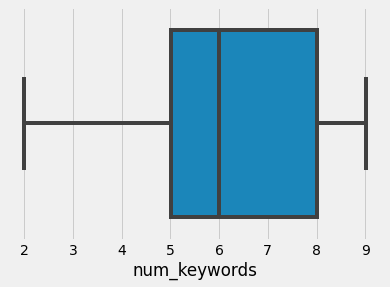

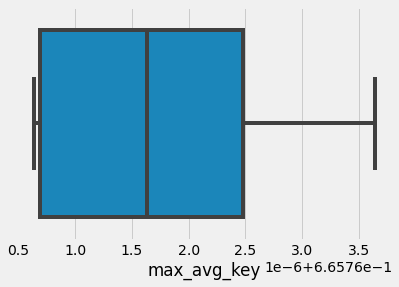

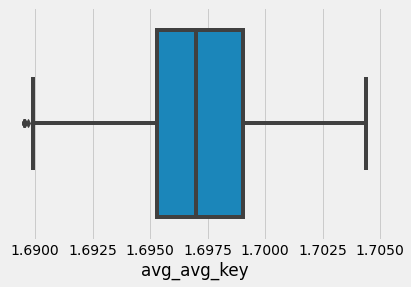

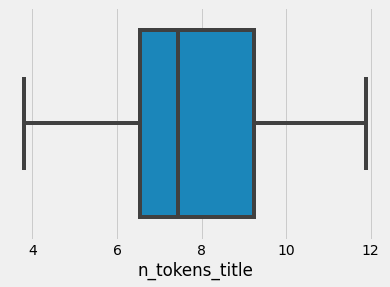

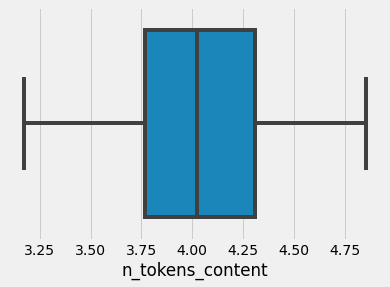

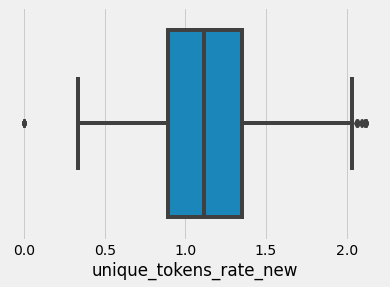

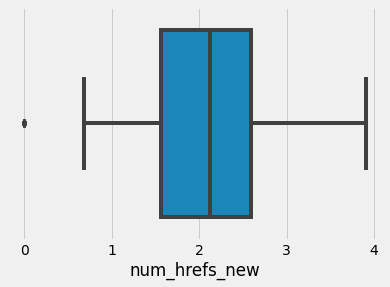

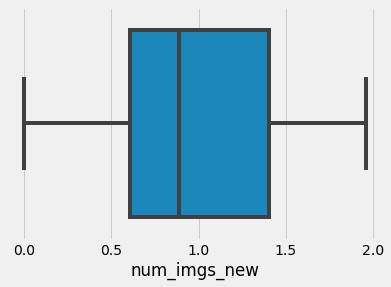

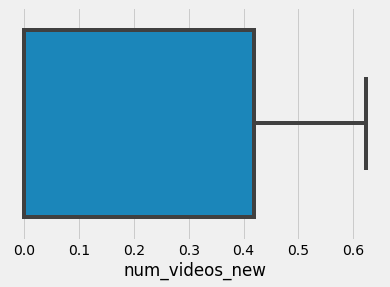

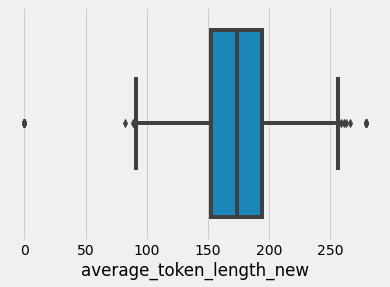

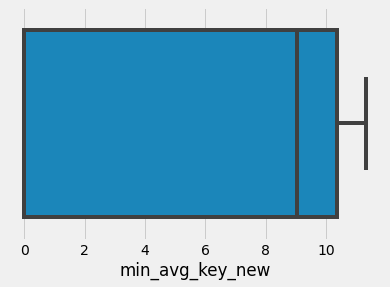

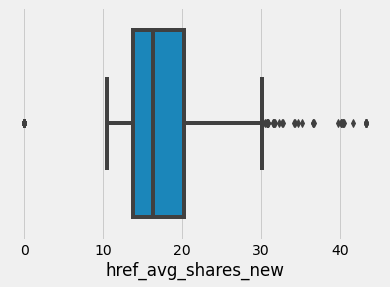

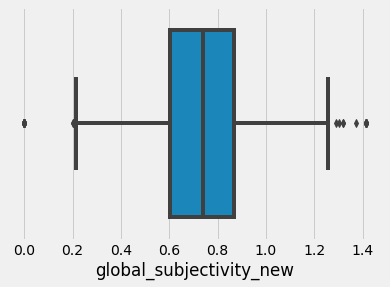

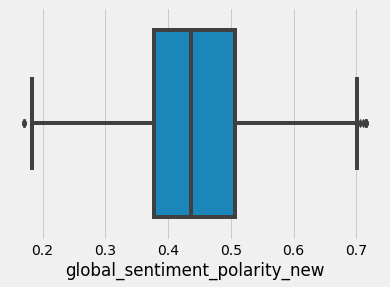

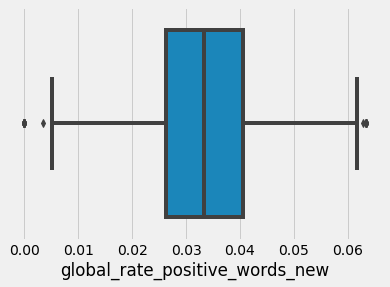

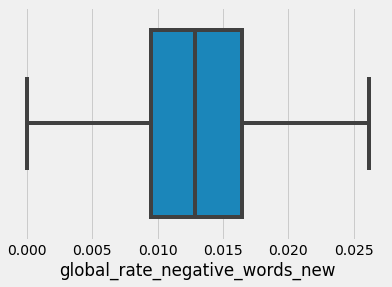

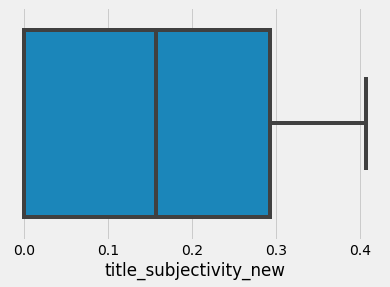

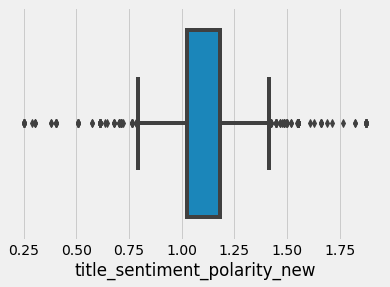

In [88]:
num_cols = df_num_add.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df_num_add[num_cols[i]])
    plt.show()

In [89]:
df_num_add.columns

Index(['num_keywords', 'max_avg_key', 'avg_avg_key', 'n_tokens_title',
       'n_tokens_content', 'unique_tokens_rate_new', 'num_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'min_avg_key_new', 'href_avg_shares_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new'],
      dtype='object')

In [90]:
df_cat.columns

Index(['is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday',
       'is_weekend', 'is_others', 'is_lifestyle', 'is_entertainment',
       'is_business', 'is_socialmedia', 'is_tech', 'title_clean', 'text_clean',
       'popularity'],
      dtype='object')

In [91]:
# Combining numeric features and catogorical and textual features.

df_final=pd.concat([df_num_add,df_cat],axis=1)

In [92]:
df_final.shape

(1003, 33)

In [95]:
df_final.columns

Index(['num_keywords', 'max_avg_key', 'avg_avg_key', 'n_tokens_title',
       'n_tokens_content', 'unique_tokens_rate_new', 'num_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'min_avg_key_new', 'href_avg_shares_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new', 'is_monday', 'is_tuesday',
       'is_wednesday', 'is_thursday', 'is_friday', 'is_weekend', 'is_others',
       'is_lifestyle', 'is_entertainment', 'is_business', 'is_socialmedia',
       'is_tech', 'title_clean', 'text_clean', 'popularity'],
      dtype='object')

In [96]:
# model ready data

df_final

num_keywords  max_avg_key  avg_avg_key  n_tokens_title  \
0         4.003769     0.665762     1.698024        5.640576   
1         6.007099     0.665761     1.695408        8.343334   
2         6.007099     0.665761     1.697030       11.886671   
3         8.010969     0.665761     1.691902        4.727965   
4         6.007099     0.665763     1.701307        7.447519   
5         3.002370     0.665762     1.699395        8.343334   
6         6.007099     0.665762     1.698743        7.447519   
7         6.007099     0.665762     1.698951        8.343334   
8         7.008976     0.665763     1.698916        6.546815   
9         4.003769     0.665762     1.699660        7.447519   
10        7.008976     0.665762     1.696918        4.727965   
11        9.013067     0.665761     1.695755        7.447519   
12        6.007099     0.665764     1.704379        4.727965   
13        8.010969     0.665761     1.694721        7.447519   
14        4.003769     0.665761     1.695080        6.546815   
15        6.007099     0.665762     1.697790       10.122254   
16        5.005356     0.665761     1.697855        7.447519   
17        4.003769     0.665761     1.696238       10.122254   
18        8.010969     0.665762     1.699066        5.640576   
19        7.008976     0.665761     1.693079        8.343334   
20        6.007099     0.665762     1.696479        7.447519   
21        4.003769     0.665761     1.695841        8.343334   
22        7.008976     0.665761     1.693995        4.727965   
23        6.007099     0.665762     1.698951       10.122254   
24        9.013067     0.665763     1.699737        6.546815   
25        8.010969     0.665761     1.696714        6.546815   
26        5.005356     0.665763     1.700352        6.546815   
27        2.001207     0.665761     1.696266        9.234773   
28        7.008976     0.665761     1.697652        7.447519   
29        7.008976     0.665763     1.700015       10.122254   
30        3.002370     0.665763     1.701795        9.234773   
31        8.010969     0.665762     1.698588        8.343334   
32        6.007099     0.665762     1.695536        9.234773   
33        6.007099     0.665762     1.699209       11.006123   
34        7.008976     0.665763     1.700169        4.727965   
35        5.005356     0.665762     1.700139        9.234773   
36        8.010969     0.665764     1.704379        3.807852   
37        9.013067     0.665763     1.700826        5.640576   
38        4.003769     0.665761     1.696201        5.640576   
39        5.005356     0.665761     1.694650        7.447519   
40        4.003769     0.665761     1.697869       10.122254   
41        9.013067     0.665761     1.695693        6.546815   
42        8.010969     0.665762     1.692022        9.234773   
43        6.007099     0.665762     1.699346        6.546815   
44        4.003769     0.665762     1.698612        6.546815   
45        9.013067     0.665762     1.699978        9.234773   
46        8.010969     0.665761     1.693636        9.234773   
47        6.007099     0.665761     1.697400        5.640576   
48        6.007099     0.665763     1.696963        6.546815   
49        7.008976     0.665763     1.700939        4.727965   
50        7.008976     0.665763     1.700733        5.640576   
51        6.007099     0.665762     1.698703        9.234773   
52        5.005356     0.665761     1.694366        6.546815   
53        9.013067     0.665761     1.694248        8.343334   
54        9.013067     0.665761     1.694448        7.447519   
55        5.005356     0.665761     1.694284        7.447519   
56        9.013067     0.665762     1.699015        7.447519   
57        6.007099     0.665761     1.695385        7.447519   
58        4.003769     0.665761     1.696263        7.447519   
59        5.005356     0.665762     1.699430        6.546815   
60        7.008976     0.665761     1.697305        6.546815   
61        9.013067     0.665761     1.

In [103]:
df_final.to_csv("news_share_data_ready.csv")